In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Ανίχνευση ακμών

**Κεφάλαιο 10, Gonzalez, Woods, §10.2** 

Οι ακμές ορίζονται ως σύνολα συνδεδεμένων εικονοστοιχείων στα οποία η ένταση μιας συνάρτησης εικόνας μεταβάλλεται απότομα.


Οι ανιχνευτές ακμών αποτελούν τοπικές μεθόδους επεξεργασίας εικόνας που είναι σχεδιασμένες για να ανιχνεύουν εικονοστοιχεία ακμών.

Μια γραμμή μπορεί να θεωρηθεί ως ένα τμήμα ακμής, όπου εκατέρωθεν αυτής υπάρχει έντονη εναλλαγή φωτεινότητας.


![Gonzalez-Woods Εικόνα 10.8](https://drive.google.com/uc?id=1xtVyCg-Hqm0yOdKvhQE9abX2cKDCyKUh)

Οι παράγωγοι μιας ψηφιακής συνάρτησης ορίζονται με τη βοήθεια διαφορών. 
 
Από κάθε τέτοια προσέγγιση υπολογισμού της **1ης παραγώγου** απαιτούμε:

 > α) να έχει μηδενική τιμή στις περιοχές σταθερής έντασης,

 > β) να είναι μη μηδενική στο ξεκίνημα μιας μεταβολής στην ένταση που περιγράφεται ως βηματική συνάρτηση ή ως μια συνάρτηση ράμπας,

 >γ) να είναι μη μηδενική σε σημεία που ανήκουν σε μία ράμπα έντασης.

 Με ανάλογο τρόπο, για προσέγγιση υπολογισμού της **2ης παραγώγου** απαιτούμε: 

>α) να έχει μηδενική τιμή στις περιοχές σταθερής έντασης,

 >β) να είναι μη μηδενική στην αρχή και στο τέλος μιας μεταβολής στην ένταση που περιγράφεται ως βηματική συνάρτηση ή ως μια συνάρτηση ράμπας,

 >γ) να είναι ίση με το μηδέν κατά μήκος μιας συνάρτησης ράμπας.

![Gonzalez-Woods Εικόνα 10.2](https://drive.google.com/uc?id=1He_fsWjdJt0FOsNhJvQ9f8bLNSXsCPyi)


![alt text](https://drive.google.com/uc?id=1uNGEg5y3YK0sic_kbUlqLIcpSoJsSCjI)

ΣΥΜΠΕΡΑΣΜΑΤΑ

> α) Οι παράγωγοι 1ης τάξης γενικά δημιουργούν ακμές μεγαλύτερου πάχους σε μία εικόνα,

> β) Οι παράγωγοι 2ης τάξης χαρακτηρίζονται από ισχυρότερη απόκριση στις μικρολεπτομέρειες(όπως λεπτές γραμμές, απομονωμένα σημεία και θόρυβο),

> γ) Οι παράγωγοι 2ης τάξης δημιουργούν μια απόκριση τύπου διπλής ακμής όταν εμφανίζονται μεταβολές βηματικές ή τύπου ράμπας,

> δ) το πρόσημο της 2ης παραγώγου μπορεί να χρησιμοποιηθεί για να καθορίσουμε αν μία μετάπτωση σε μία ακμή, είναι από τη φωτεινή στη σκοτεινή πλευρά ή αντίστροφα.

Για τον υπολογισμό της 1ης και της 2ης παραγώγου, σε κάθε θέση εικονοστοιχείου μιας εικόνας, χρησιμοποιούμε χωρικά φίλτρα.


## Ανίχνευση ακμών και θόρυβος
Στην παρακάτω εικόνα παρουσιάζεται η συμπεριφορά της 1ης και της 2ης παραγώγου μιας ακμής, παρουσίας θορύβου

![alt text](https://drive.google.com/uc?id=1L6AK1ccjJO-b9t65XWnC6v2jzuF15fXH)

## Βασικά στάδια ανίχνευσης ακμών:

1.  Εξομάλυνση εικόνας για απομάκρυνση θορύβου
2.  Ανίχνευση των σημείων των ακμών (εύρεση πιθανών υποψηφίων για να καταστούν σημεία ακμών).
3. Εντοπισμός ακμών (επιλογή από τα υποψηφία σημεία, από το βήμα 2, μόνο εκείνων που ακήκουν πράγματι στο σύνολο των σημείων που συνιστούν μία ακμή.



In [2]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
from scipy import signal
from skimage import filters
from scipy import ndimage as ndi

Θα δημιουργήσουμε μία συνάρτηση για τις απεικονίσεις:

In [3]:
from skimage import img_as_float

def imshow_all(*images, titles=None):
    images = [img_as_float(img) for img in images]

    if titles is None:
        titles = [''] * len(images)
    vmin = min(map(np.min, images))
    vmax = max(map(np.max, images))
    ncols = len(images)
    height = 5
    width = height * len(images)
    fig, axes = plt.subplots(nrows=1, ncols=ncols,
                             figsize=(width, height))
    for ax, img, label in zip(axes.ravel(), images, titles):
        ax.imshow(img,  cmap='gray', interpolation='None')#vmin=vmin, vmax=vmax,
        ax.set_title(label)


##Βασικές μέθοδοι για ανίχνευση ακμών

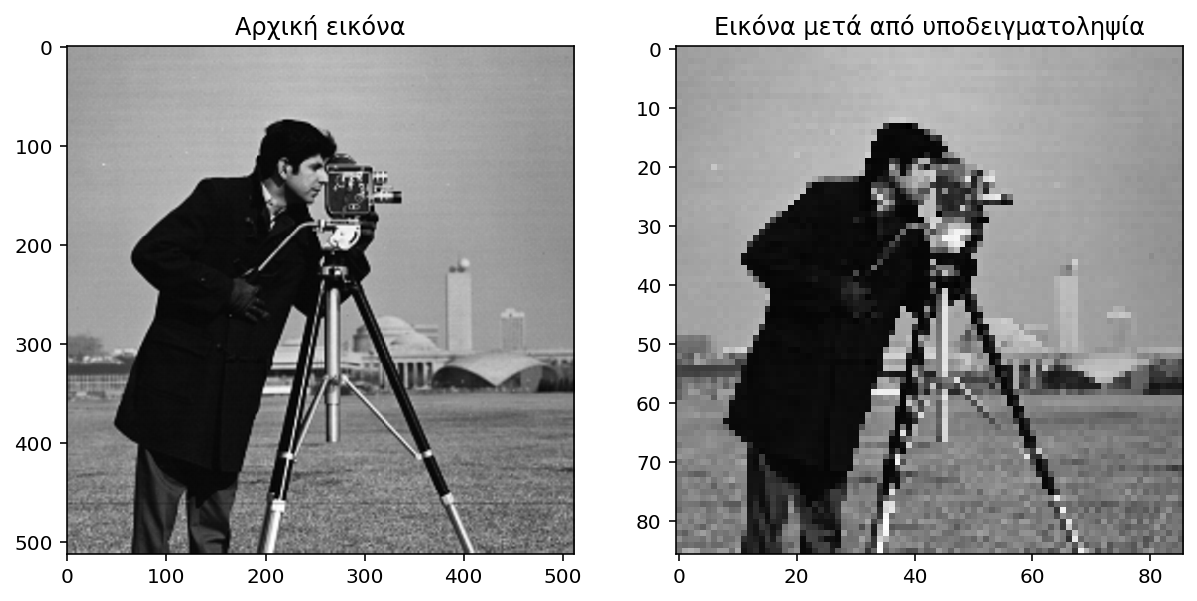

In [4]:
from skimage import data

image = data.camera()
pixelated = image[::6, ::6]

imshow_all(image, pixelated, titles=['Αρχική εικόνα', 'Εικόνα μετά από υποδειγματοληψία'])

### Χρήση παραγώγων 1ης τάξης για (μη γραμμική) όξυνση της εικόνας (Κλίση)



Η ισχύς και η διεύθυνση μιας ακμής στη θέση $(x,y)$ μίας εικόνας $f$,είναι η κλίση της εικόνας που συμβολίζεται ως $\nabla f$ και ορίζεται ως διάνυσμα $\nabla f=grad(f)=\begin{bmatrix}g_x\\g_y\\\end{bmatrix}=\begin{bmatrix}\frac{\partial f}{\partial x}\\\frac{\partial f}{\partial y}\\\end{bmatrix}$ όπου 

$g_x=\frac{\partial f}{\partial x}=f(x+1,y)-f(x,y)\  (1)$

και 

$g_y=\frac{\partial f}{\partial y}=f(x,y+1)-f(x,y)\  (2)$


To διάνυσμα αυτό διαθέτει μία σημαντική γεωμετρική ιδιότητα να δείχνει πάντοτε προς την διεύθυνση του μεγαλύτερου ρυθμού μεταβολής της $f$ στη θέση $(x,y)$.

To μέτρο δηλαδή το μήκος του $\nabla f$ δίνεται από τον τύπο :
$Μ(x,y)=mag(\nabla f)=\sqrt{g_x^2+g_y^2}$

H διεύθυνση του διανύσματος κλίσης προσδιορίζεται από τη γωνία $α(x,y)=tan^{-1} \left[ \frac{g_y}{g_x}\right]$, υπολογιζόμενη ως προς τον άξονα x. 

![](https://drive.google.com/uc?id=1m6sxEz3Biwg52aDWD1AtuZEbUlUJLBjl)

Οπότε χρησιμοποιώντας την κλίση μπορούμε να προσδιορίσουμε την τιμή της ακμής και τη διεύθυνσή της σε κάποιο σημείο της εικόνας.

Η ακμή είναι κάθετη στη διεύθυνση του διανύσματος της κλίσης στο σημείο που αυτή υπολογίζεται.

Οι εξισώσεις (1) και (2) μπορούν να υλοποιηθούν, φιλτράροντας την εικόνα $f(x,y)$ με τις μονοδιάστατες μάσκες : 
![](https://drive.google.com/uc?id=1ifAEhr2wj9ggxhiPS8AAh2jQ5rMU0iK_)

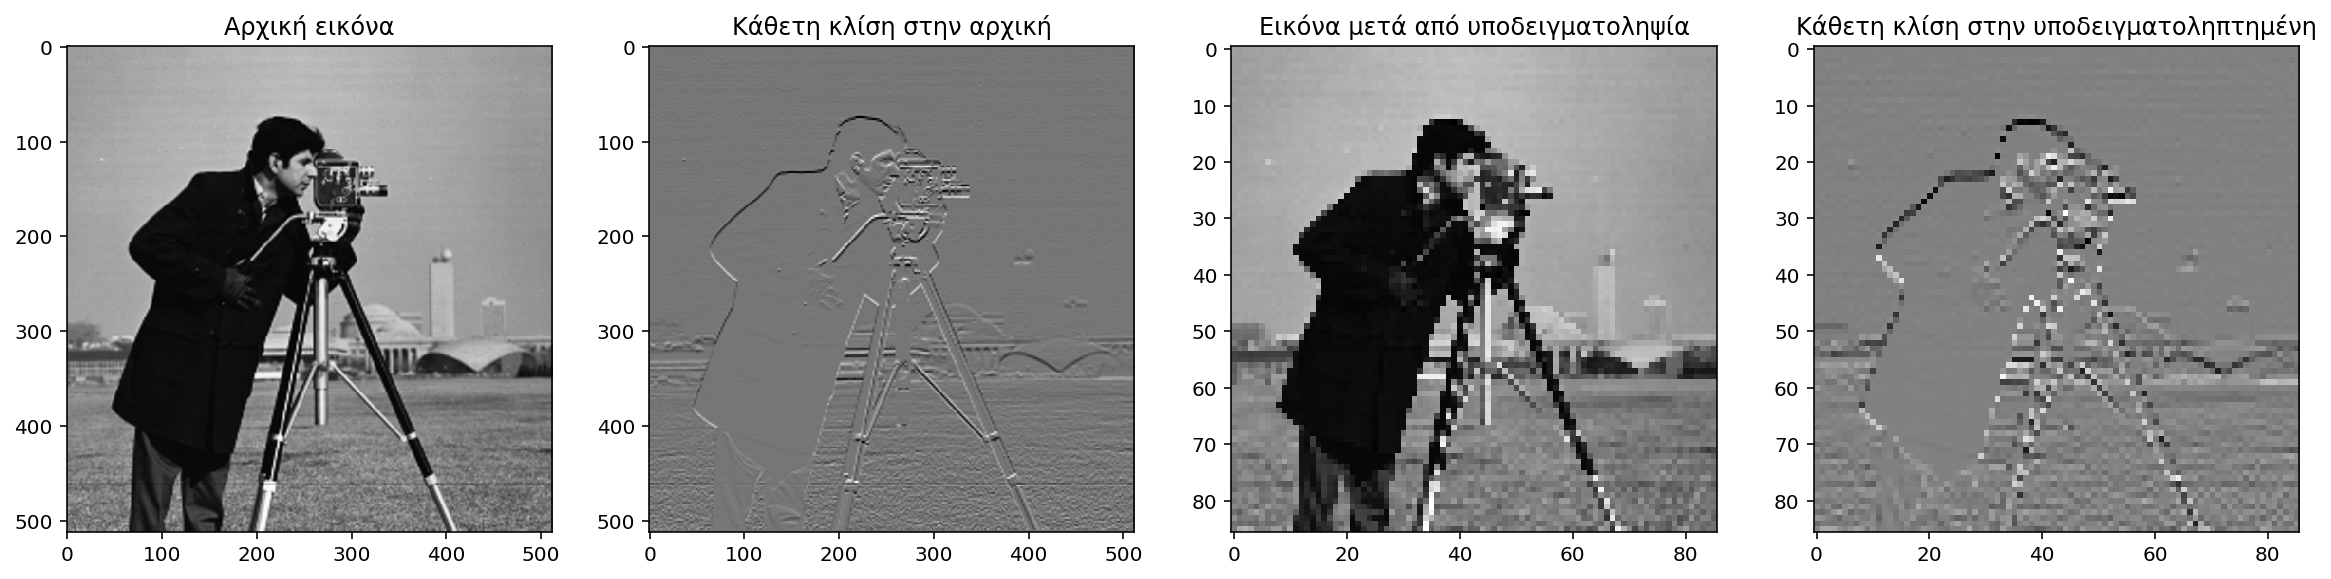

In [5]:
vertical_kernel = np.array([
    [-1],
     [1],
])

# Δοκιμάστε και ως vertical_kernel το [-1 0 1] ή και το [-1 -1 0 1 1]

px_gradient_vertical = ndi.correlate(pixelated.astype(float),vertical_kernel)
im_gradient_vertical = ndi.correlate(image.astype(float),vertical_kernel)

imshow_all(image, im_gradient_vertical, pixelated, px_gradient_vertical, titles=['Αρχική εικόνα','Κάθετη κλίση στην αρχική', 
                                                                                 'Εικόνα μετά από υποδειγματοληψία','Κάθετη κλίση στην υποδειγματοληπτημένη'])


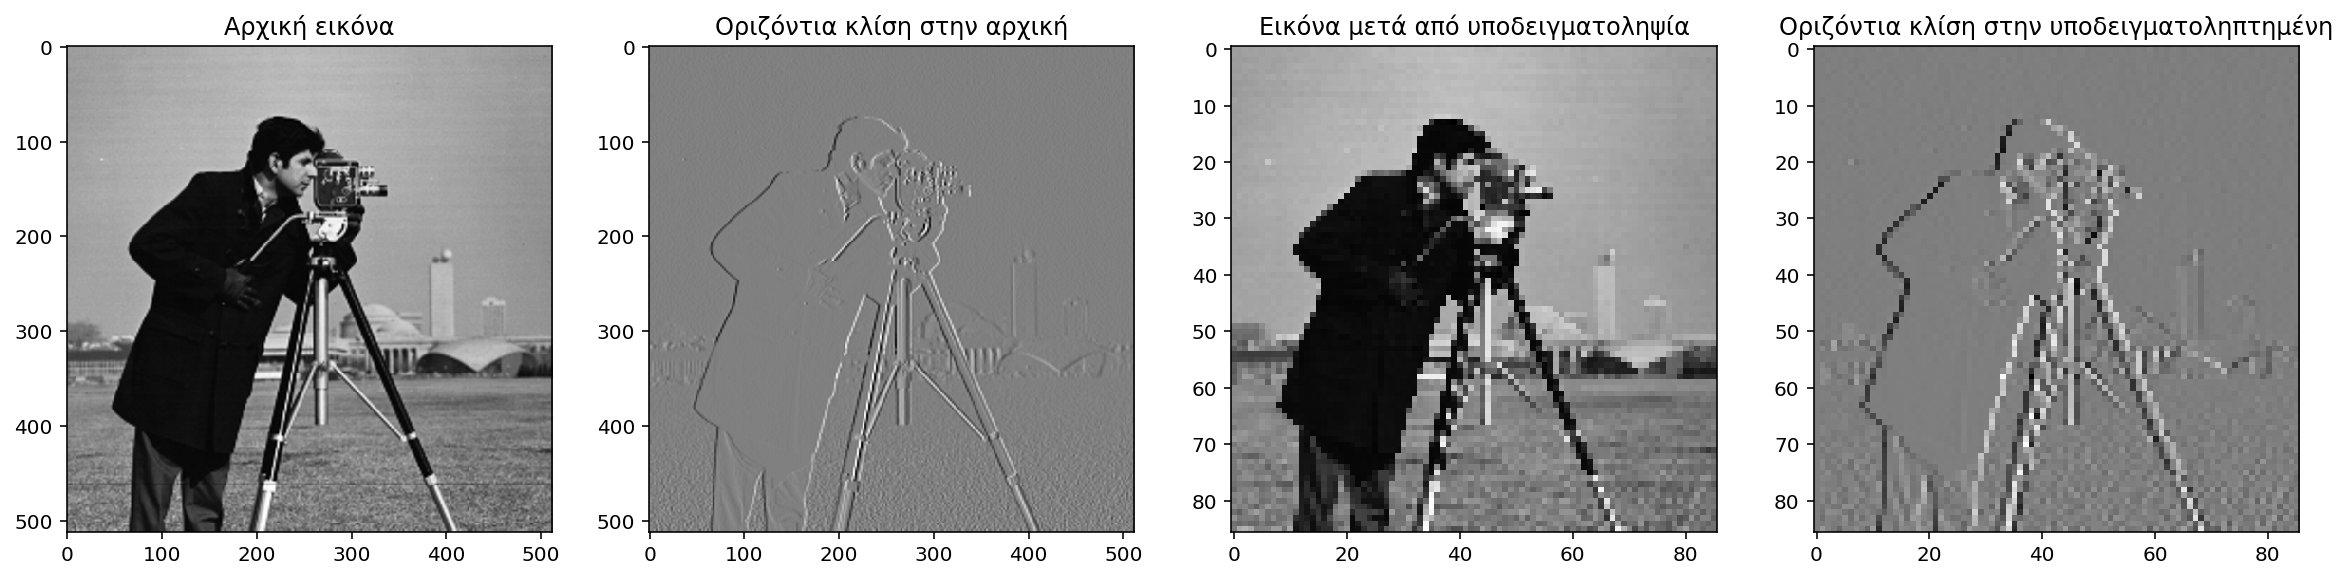

In [6]:
horizontal_kernel = vertical_kernel.T

px_gradient_horizontal = ndi.correlate(pixelated.astype(float),horizontal_kernel)
im_gradient_horizontal = ndi.correlate(image.astype(float),horizontal_kernel)

imshow_all(image, im_gradient_horizontal, pixelated, px_gradient_horizontal, titles=['Αρχική εικόνα','Οριζόντια κλίση στην αρχική', 'Εικόνα μετά από υποδειγματοληψία',
                                                                                     'Οριζόντια κλίση στην υποδειγματοληπτημένη'])

Υπολογισμός του μέτρου $\left|g\right| = \sqrt{g_x^2 + g_y^2}$

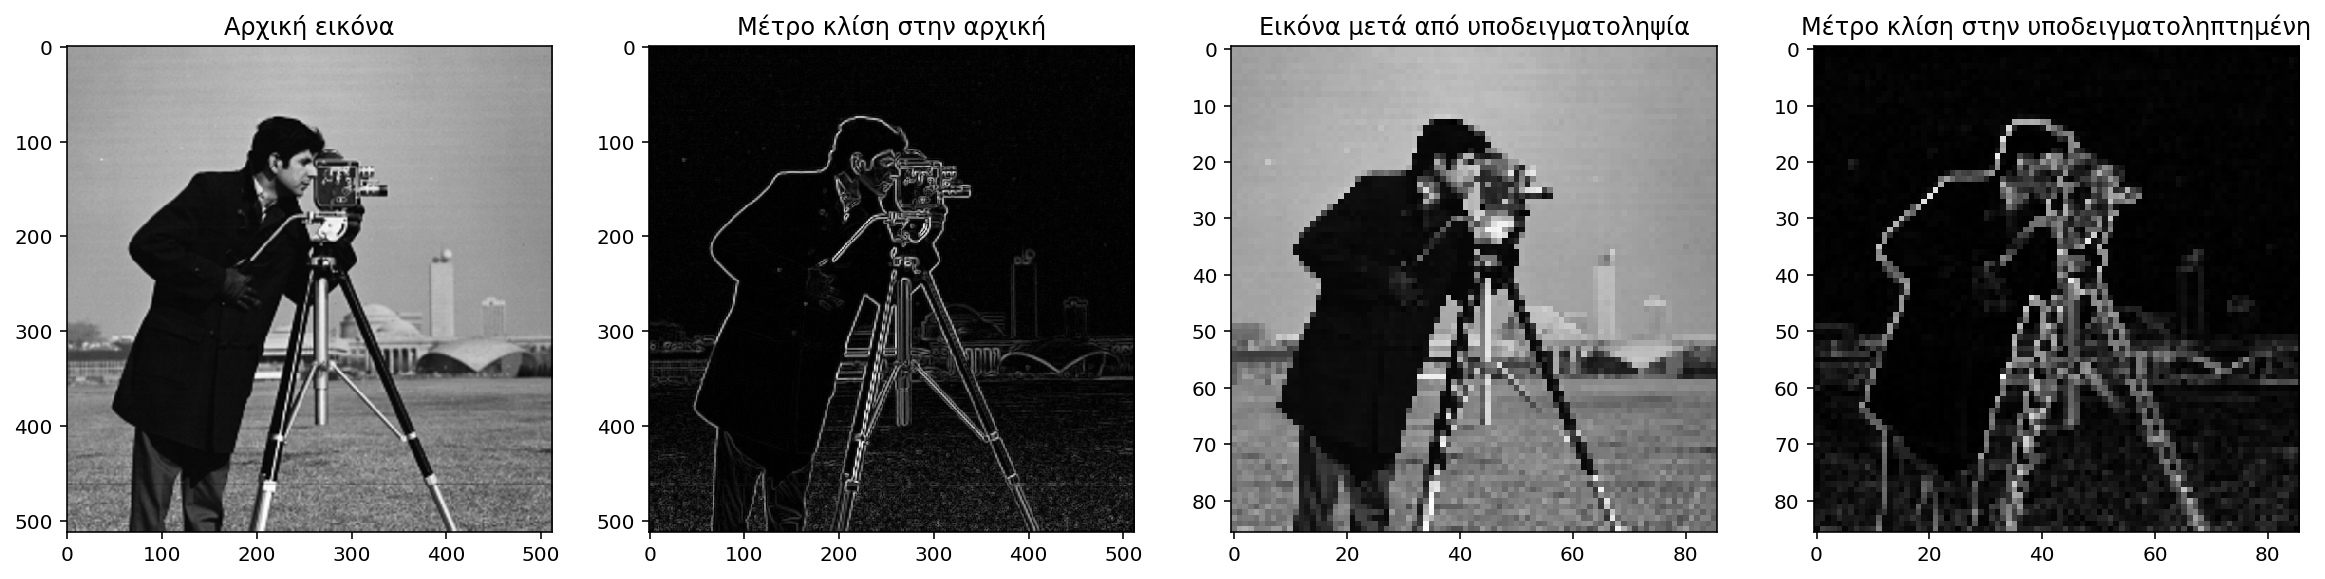

In [7]:
px_gradient_mag = np.sqrt(px_gradient_vertical**2 + px_gradient_horizontal**2)
im_gradient_mag = np.sqrt(im_gradient_vertical**2 + im_gradient_horizontal**2)

imshow_all(image,im_gradient_mag/255, pixelated, px_gradient_mag/255, titles=['Αρχική εικόνα','Μέτρο κλίση στην αρχική', 'Εικόνα μετά από υποδειγματοληψία',
                                                                              'Μέτρο κλίση στην υποδειγματοληπτημένη'])


#### Φίλτρα υπολογισμού κλίσης σε σημείο

Έστω ότι το ακόλουθο παρουσιάζει μία περιοχή 3x3 μιας εικόνας με τις μεταβλητές $z$ να εκφράζουν τιμές έντασης:


![](https://drive.google.com/uc?id=1kR4YDGGdzs9ewAK_TKnpaR2lv1KTxOUK)

#### Τελεστές διασταυρούμενης κλίσης Roberts

Χρησιμοποιείται για την ανίχνευση διαγωνίων ακμών. Ήταν από τις πρώτες απόπειρες χρήσης δισδιάστατων μασκών με προτίμηση στη διαγώνιο διεύθυνση. Οι τελεστές Roberts (Roberts, 1965) στηρίζονται στην υλοποίηση των διαγωνίων διαφορών: $g_x=\frac{\partial f}{\partial x}=z_9-z_5$ και $g_y=\frac{\partial f}{\partial y}=z_8-z_6$


![](https://drive.google.com/uc?id=1Dd6NpnO_SkbiS7p3TBjrj4h7h5HpsgZh)

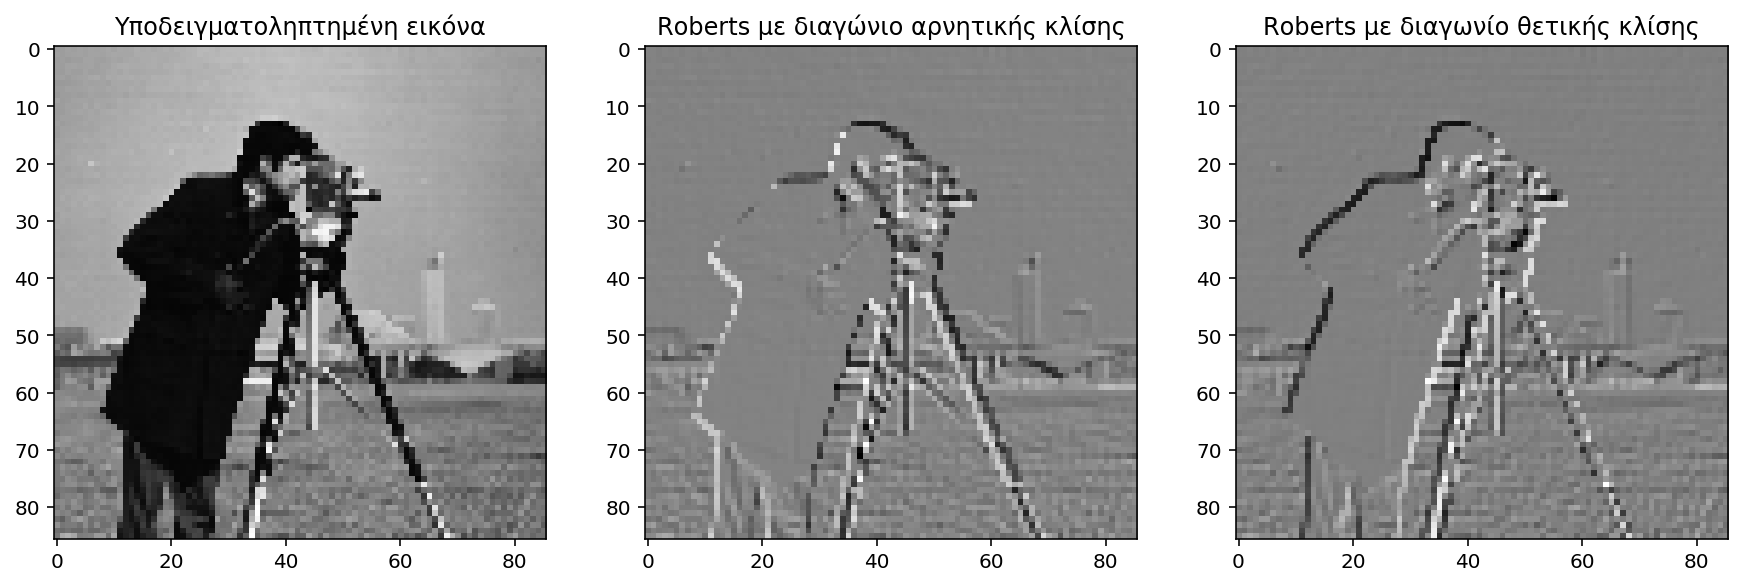

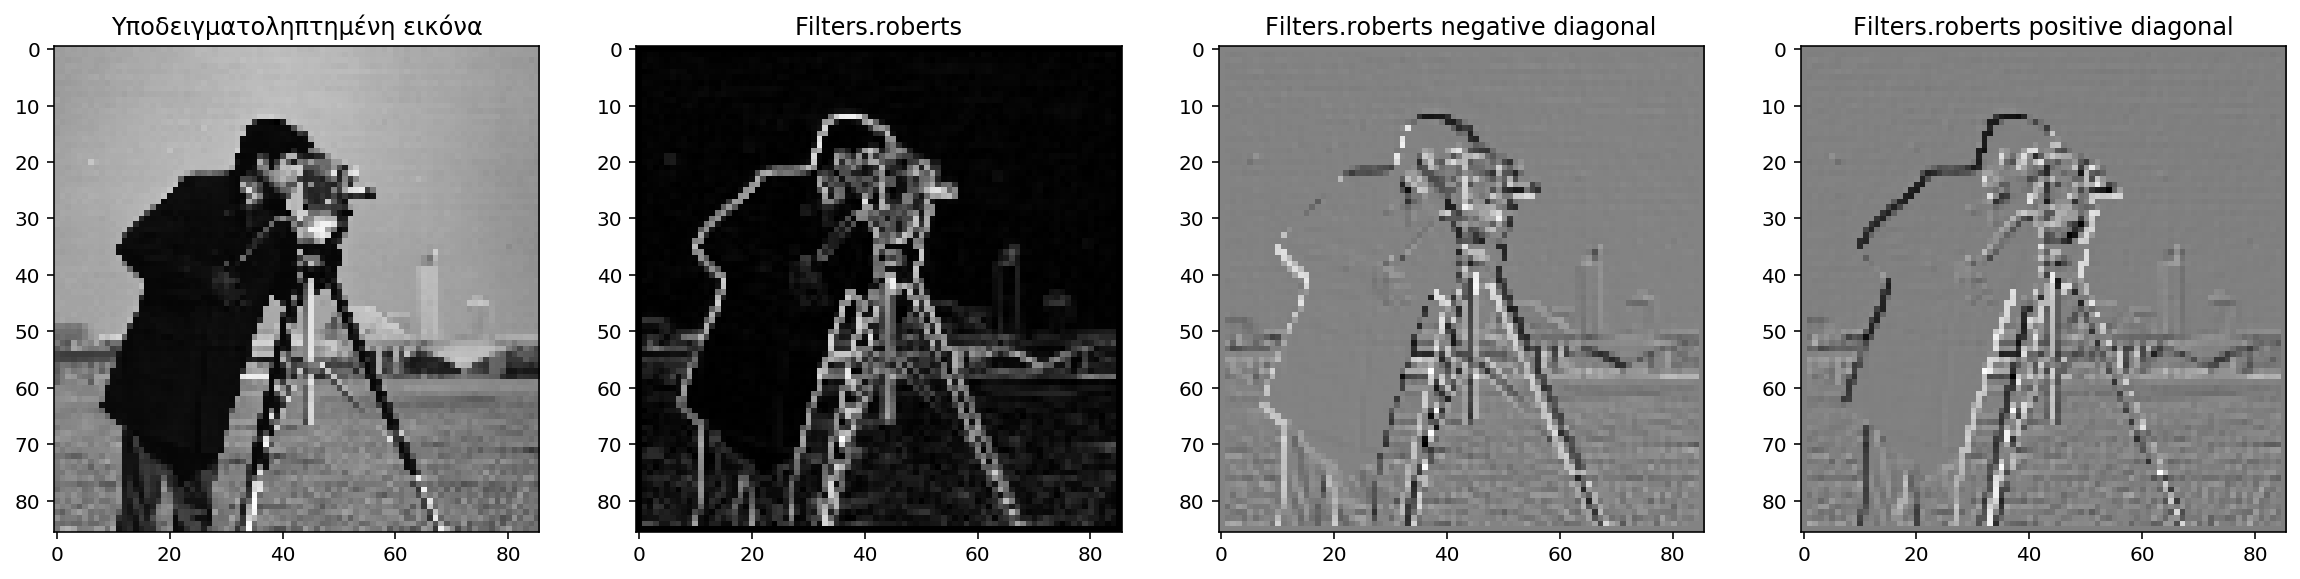

In [8]:
Roberts_diagonal_pos_kernel = np.array([
    [-1,0],
     [0,1],
])

Roberts_diagonal_neg_kernel = np.array([
    [0,-1],
     [1,0],
]) 



Rpos_gradient = ndi.correlate(pixelated.astype(float),Roberts_diagonal_pos_kernel )
Rneg_gradient = ndi.correlate(pixelated.astype(float),Roberts_diagonal_neg_kernel )

# Χρήση έτοιμης συνάρτησης από το skimage
Redges = filters.roberts(pixelated)
Redges_neg = filters.roberts_neg_diag(pixelated)
Redges_pos=filters.roberts_pos_diag(pixelated)

imshow_all( pixelated, Rneg_gradient, Rpos_gradient, titles=['Υποδειγματοληπτημένη εικόνα','Roberts με διαγώνιο αρνητικής κλίσης', 
                                                                                            'Roberts με διαγωνίο θετικής κλίσης'])
imshow_all( pixelated,  Redges, Redges_neg, Redges_pos,titles=['Υποδειγματοληπτημένη εικόνα','Filters.roberts','Filters.roberts negative diagonal',
                                                                                            'Filters.roberts positive diagonal'])

#### Tελεστές Prewitt
Οι μάσκες που είναι συμμετρικές ως προς το κέντρο τους (η μικρότερη εκ των οποίων έχει διαστάσεις 3x3) είναι πιο αποτελεσματικές από τις 2x2. Οι μάσκες λαμβάνουν υπ' όψη τη γειτονιά του κεντρικού εικονοστοιχείου και μεταφέρουν περισσότερη πληροφορία για τη διεύθυνση μιας ακμής και δίδονται από τις σχέσεις:

$g_x=\frac{\partial f}{\partial x}=(z_7+z_8+z_9)-(z_1+z_2+z_3)$ (προσέγγιση της τιμής tης παραγώγου ως προς το x) και 

$g_y=\frac{\partial f}{\partial y}=(z_3+z_6+z_9)-(z_1+z_4+z_7)$ (προσέγγιση της τιμής tης παραγώγου ως προς το y)

Αυτές οι μάσκες είναι γνωστές ως τελεστές Prewitt (Prewitt, 1970)


![](https://drive.google.com/uc?id=1YgN-3TrAGQQ44t4QWtIArvSbfWNLVkNG)

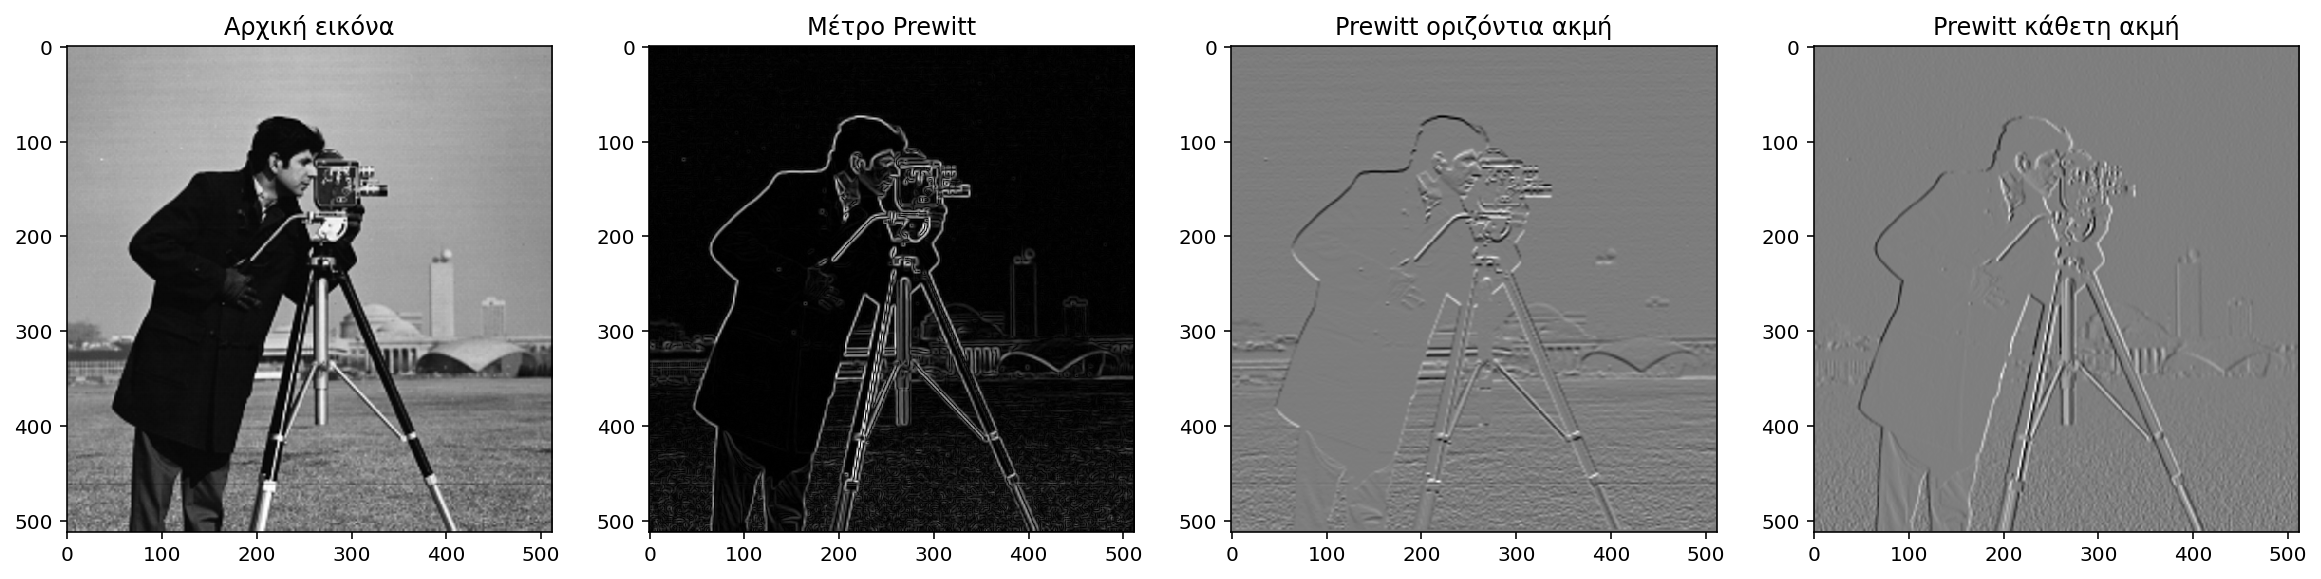

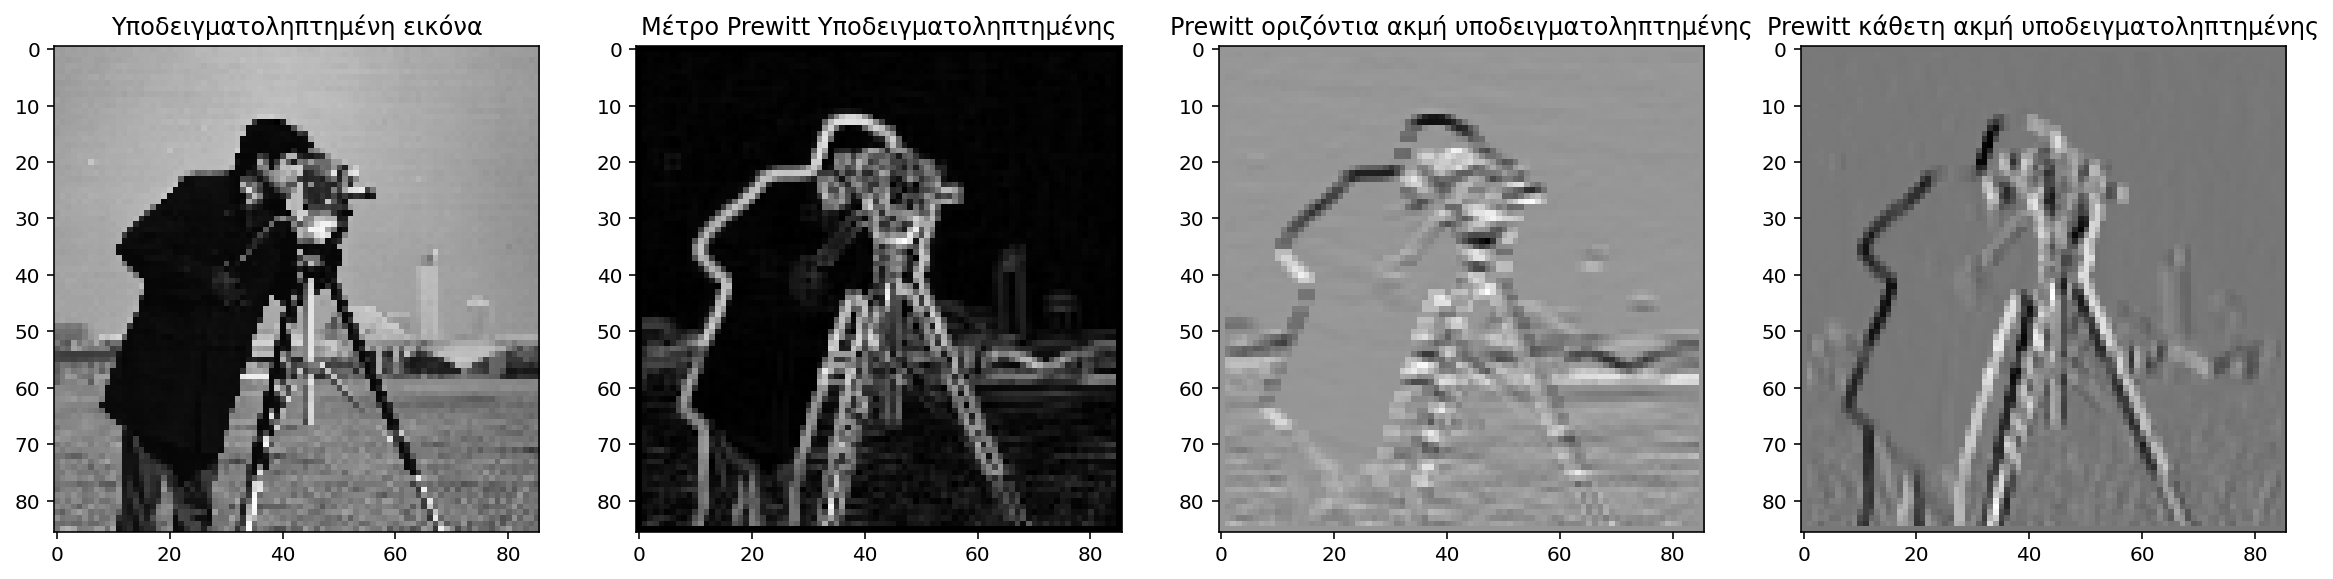

In [9]:
Prewitt_edges=filters.prewitt(image) # Find the edge magnitude using the Prewitt transform.
Prewitt_edges_h=filters.prewitt_h(image) # Find the horizontal edges of an image using the Prewitt transform.
Prewitt_edges_v=filters.prewitt_v(image) # Find the vertical edges of an image using the Prewitt transform.

imshow_all(image, Prewitt_edges, Prewitt_edges_h, Prewitt_edges_v, titles=['Αρχική εικόνα','Μέτρο Prewitt',
                                                                               'Prewitt οριζόντια ακμή', 'Prewitt κάθετη ακμή'])

Prewitt_edges=filters.prewitt(pixelated) # Find the edge magnitude using the Prewitt transform.
Prewitt_edges_h=filters.prewitt_h(pixelated) # Find the horizontal edges of an image using the Prewitt transform.
Prewitt_edges_v=filters.prewitt_v(pixelated) # Find the vertical edges of an image using the Prewitt transform.

imshow_all(pixelated, Prewitt_edges, Prewitt_edges_h, Prewitt_edges_v, titles=['Υποδειγματοληπτημένη εικόνα','Μέτρο Prewitt Υποδειγματοληπτημένης',
                                                                               'Prewitt οριζόντια ακμή υποδειγματοληπτημένης', 'Prewitt κάθετη ακμή υποδειγματοληπτημένης'])

#### Τελεστές Sobel

Χρησιμοποιώντας τιμή βάρους ίση με 2 για την κεντρική θέση της μάσκας, επιτυγχάνεται εξομάλυνση της εικόνας (τις καθιστά προτιμητέες έναντι των άλλων). Οι μάσκες αυτές προτάθηκαν από το Sobel το 1970 και έχουν πάρει το όνομά του και έχουν τη μορφή:

![](https://drive.google.com/uc?id=1cxelMSSDJlI9xoVIcmFPReSFA9jym2q2)

και δίδονται από τις σχέσεις:

$g_x=\frac{\partial f}{\partial x}=(z_7+2z_8+z_9)-(z_1+2z_2+z_3)$ (προσέγγιση της τιμής ης παραγώγου ως προς το x) και 

$g_y=\frac{\partial f}{\partial y}=(z_3+2z_6+z_9)-(z_1+2z_4+z_7)$ (προσέγγιση της τιμής ης παραγώγου ως προς το y)

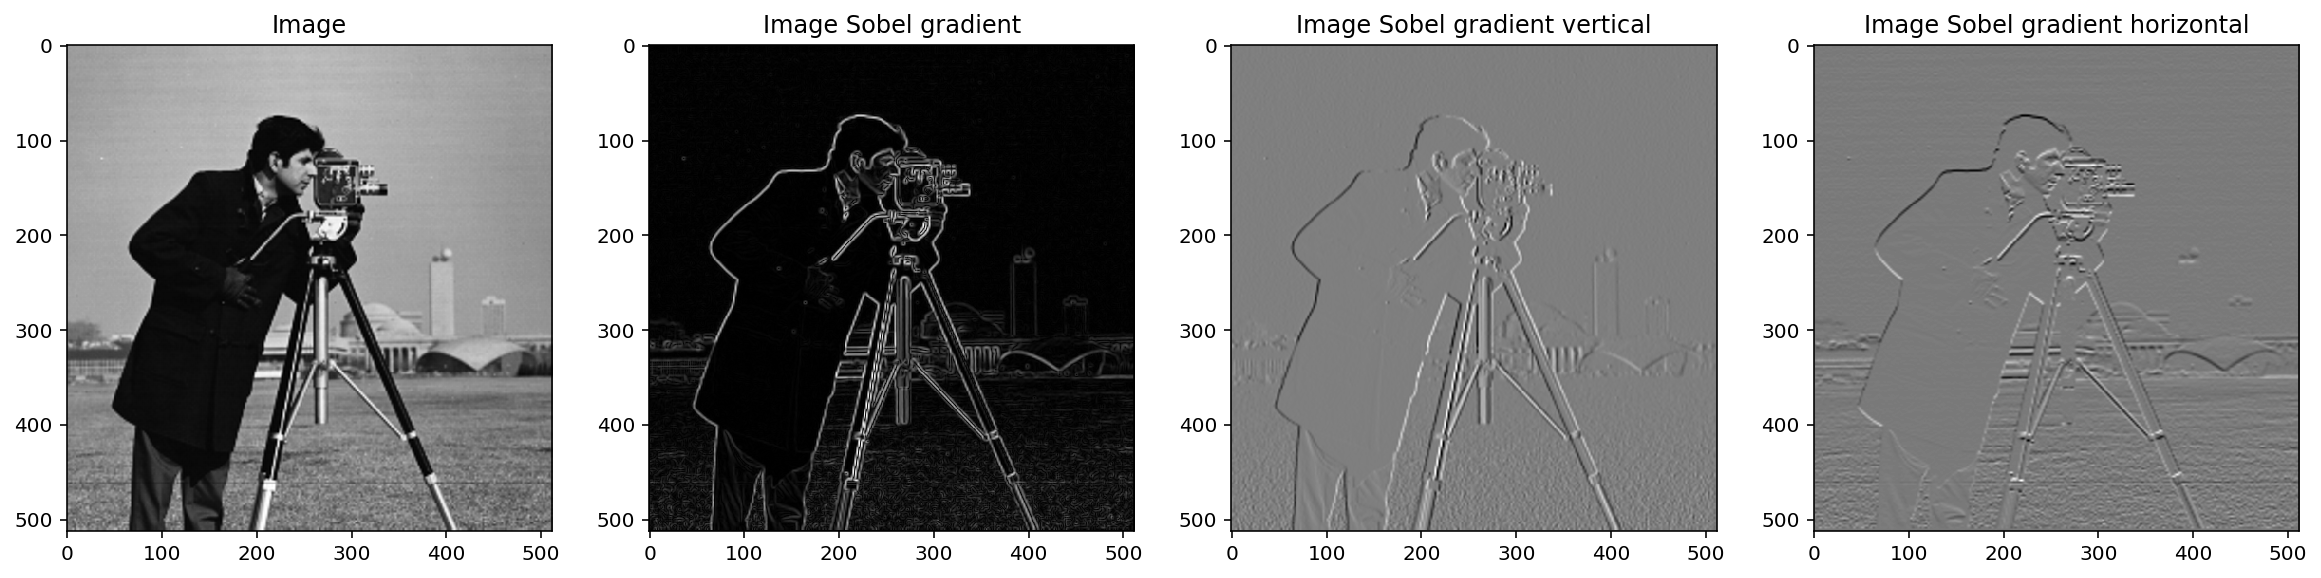

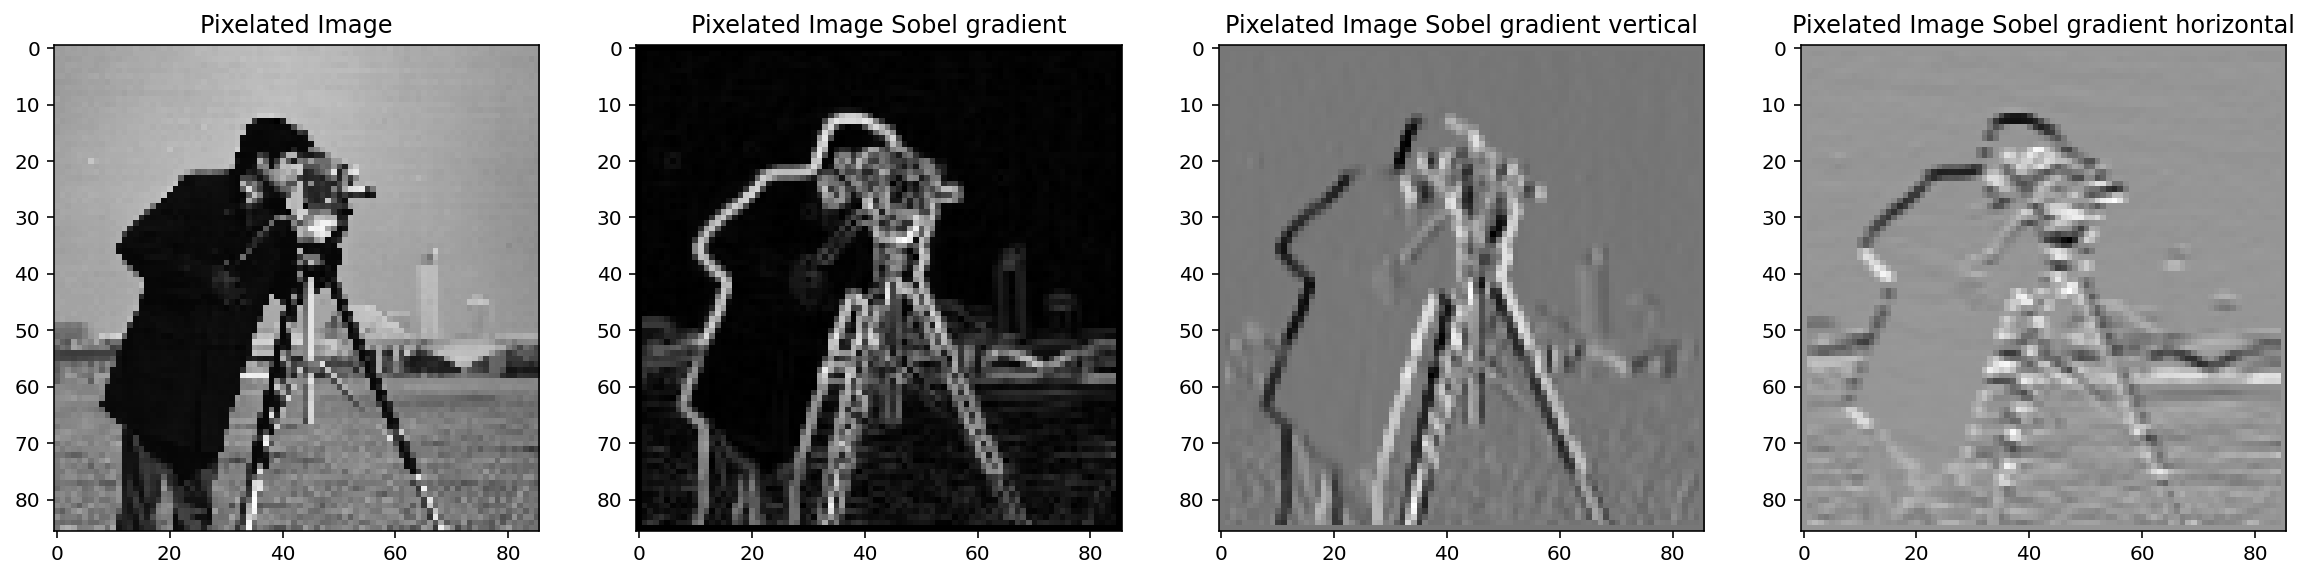

In [10]:
image_gradient = filters.sobel(image)
image_gradient_v = filters.sobel_v(image)
image_gradient_h = filters.sobel_h(image)
imshow_all(image, image_gradient, image_gradient_v,image_gradient_h,titles=['Image','Image Sobel gradient',
                                                                            'Image Sobel gradient vertical','Image Sobel gradient horizontal'])

pixelated_gradient = filters.sobel(pixelated)
pixelated_gradient_v = filters.sobel_v(pixelated)
pixelated_gradient_h = filters.sobel_h(pixelated)
imshow_all(pixelated, pixelated_gradient, pixelated_gradient_v,pixelated_gradient_h, titles=['Pixelated Image','Pixelated Image Sobel gradient',
                                                                                             'Pixelated Image Sobel gradient vertical','Pixelated Image Sobel gradient horizontal'])

#### Εξομάλυνση πριν την ανίχνευση ακμών 

Η εξομάλυνση χρησιμοποιείται συχνά ως προκαταρκτικό βήμα κατά την προετοιμασία για την ανίχνευση χαρακτηριστικών και για λειτουργίες βελτίωσης εικόνας, επειδή τα αιχμηρά χαρακτηριστικά της εικόνας μπορούν να αλλοιώσουν τα αποτελέσματα.

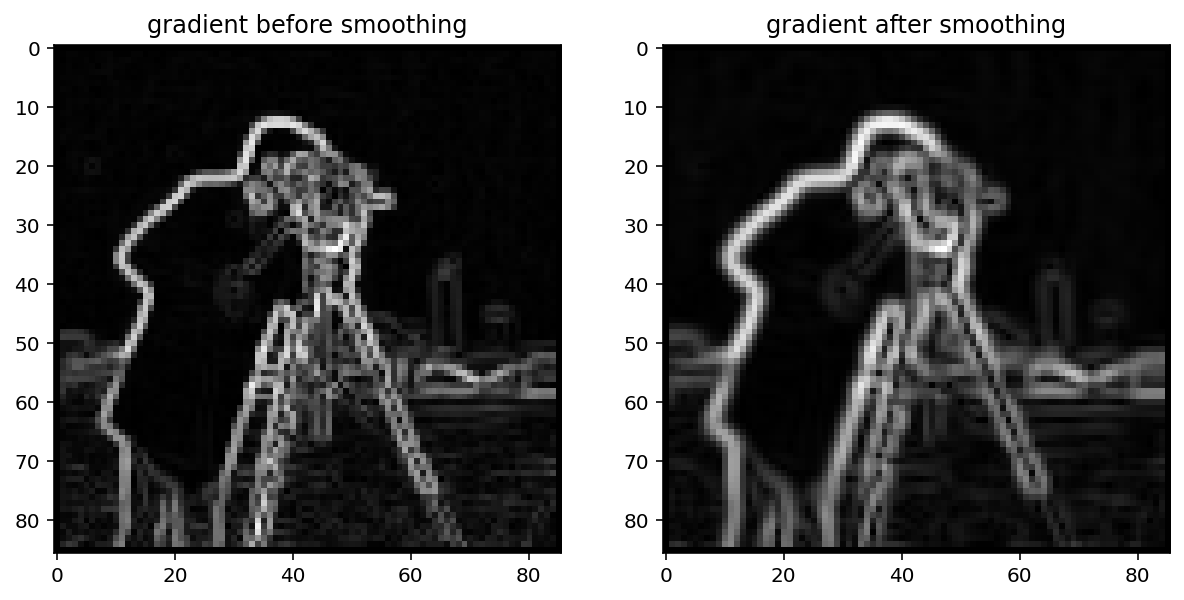

In [11]:
sigma = 1
smooth = filters.gaussian(pixelated, sigma)

gradient = filters.sobel(smooth)
titles = ['gradient before smoothing', 'gradient after smoothing']
# Scale smoothed gradient up so they're of comparable brightness.
imshow_all(pixelated_gradient, gradient*1.8, titles=titles)

Παρατηρήστε ότι οι άκρες φαίνονται πιο συνεχείς στην εξομαλυμένη εικόνα

Η συνέλιξη του φίλτρου Sobel με την εικόνας, μας επιστρέφει έναν πίνακα στο μέγεθος της εικόνας που περιέχει την πιθανότητα ένα εικονοστοιχείο να βρίσκεται στην άκρη ενός αντικειμένου. 

Με την χρήση της κατωφλίωσης μπορούμε να αποφασίσουμε, αν ένα pixel ανήκει σε ακμή ή όχι.

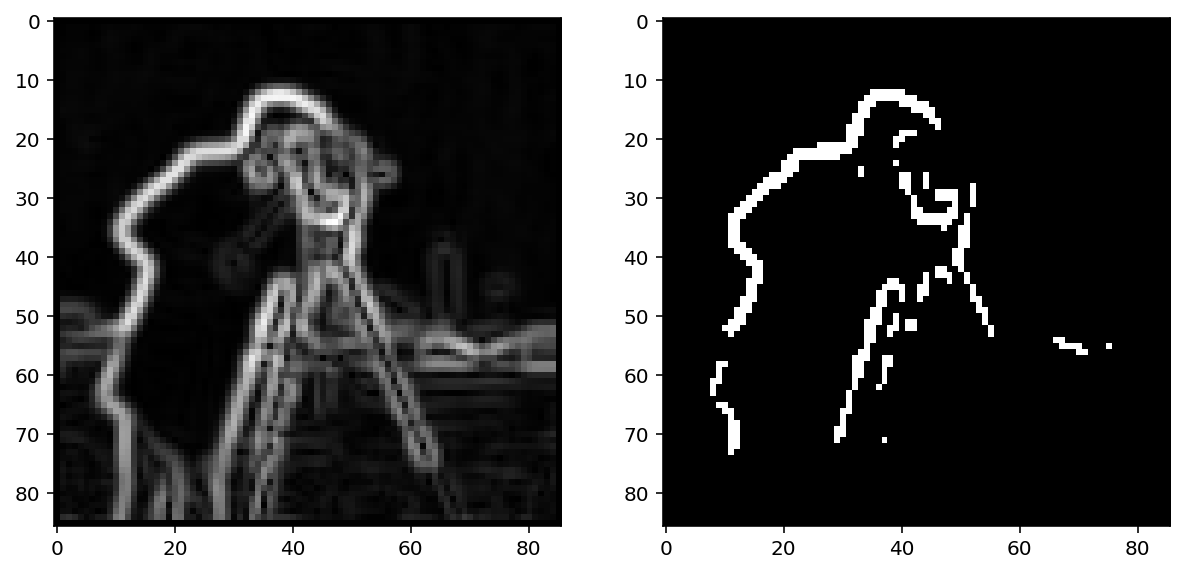

In [12]:
imshow_all(gradient, gradient > 0.2)

Αυτή η προσπάθεια μπορούμε να πούμε ότι προκαλεί θόρυβο και λέπτυνση και δεν λαμβάνει υπόψη της την κατεύθυνση των ακμών.

####**Ένα απλό νευρωνικό δίκτυο**

Υποθέτουμε ότι έχουμε μια εικόνα(sourxe) και μια 'ground truth' εικόνα (target) που αναπαριστά αυτό που θέλουμε να ανιχνεύσουμε. Με τη βοήθεια της μηχανικής μάθησης θα προσπαθήσουμε να βρούμε ένα 3x3 φίλτρο συνέλιξης που αν το εφαρμόσουμε στην αρχική εικόνα να παίρνουμε την εικόνα-στόχο.

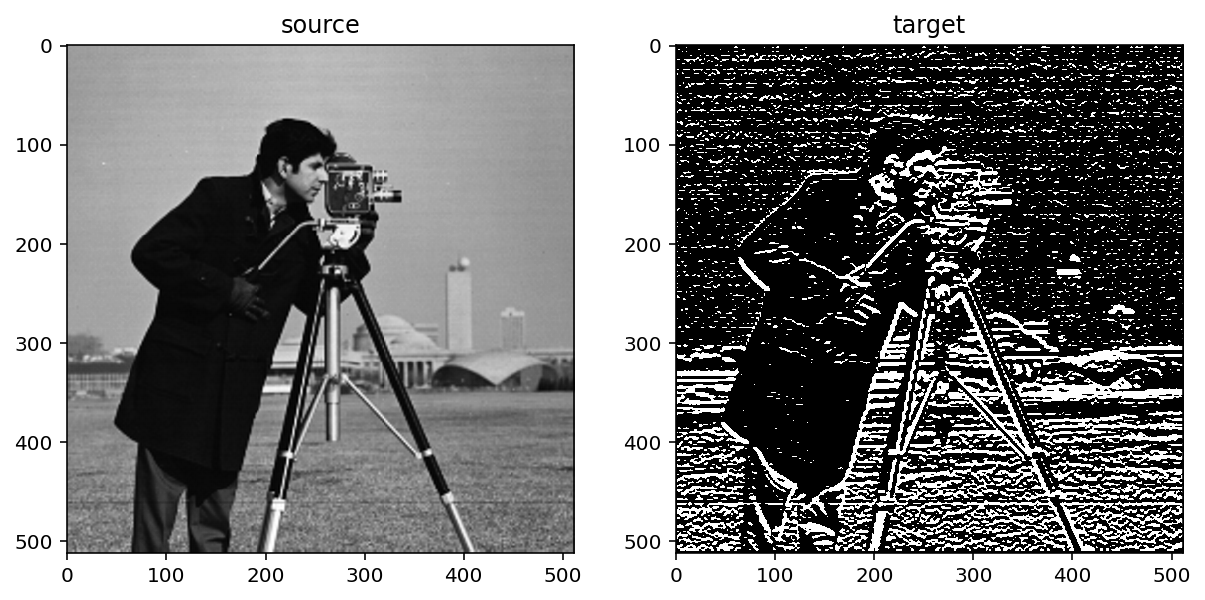

In [13]:
target = (filters.sobel_h(image) > 0.01)
imshow_all(image, target, titles=['source', 'target'])

In [14]:
print(image.shape)

(512, 512)


Το `skimage.util.view_as_windows` και το `np.reshape` δίνει τη δυνατότητα να δούμε την εικόνα ως σύνολο (περίπου) 3x3 patches `npixels`. 

(Συμβουλή: γιατί είναι μόνο κατά προσέγγιση; Σκεφτείτε τις συνέπειες `mode = valid`.)

In [15]:
from skimage import util

windows = util.view_as_windows(image, (3, 3))
print(windows.shape)
X = windows.reshape((510*510, 9))
print(X.shape)

(510, 510, 3, 3)
(260100, 9)


Τον πίνακα Χ τον θεωρούμε ως πίνακα χαρακτηριστικών  (`npixels`, 9). Χρησιμοποιούμε την τεμαχιοποίηση της αρχικής εικόνας και το `np.ravel` για να πάρουμε έναν πίνακα npixels των τιμών της εικόνας στόχου.


In [16]:
y = target[1:-1, 1:-1].reshape((510*510,))  #[start:end]
print(y)

[False False False ... False False False]


Χρησιμοποιούμε το `sklearn.linear_model.LogisticRegression` για να μάθoυμε τη σχέση μεταξύ των γειτονικών pixel της εικόνας (μεγέθους 9) και της εικόνας στόχου.

In [17]:
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression(random_state=0).fit(X, y)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Συγκρίνεται την μάσκα αυτή με τους συντελεστές Sobel

In [18]:
mask=clf.coef_.reshape((3, 3))
print(mask)

[[ -7.60583393 -14.42811281  -7.49412344]
 [  0.43140077  -0.62702492   0.24663532]
 [  7.15148449  15.08359464   7.24275266]]


---

### Ανιχνευτής ακμών Canny

Η απόδοση του ανιχνευτή ακμών Canny (1986) υπερτερεί γενικά έναντι της απόδοσης των αλγορίθμων ανίχνευσης ακμών που είδαμε μέχρι τώρα. Η προσέγγιση του Canny αποσκοπεί στην υλοποίηση  βασικών στόχων όπως χαμηλό ρυθμό σφαλμάτων(ανίχνευση ακμών όσο πιο κοντά στις πραγματικές ακμές, όχι ανίχνευση πλασματικών ακμών), και το πλήθος των τοπικών μεγίστων που εντοπίζει ο ανιχνευτής γύρω από την πραγματική ακμή θα πρέπει να είναι ελάχιστο.

Ο ανιχνευτής ακμών Canny συνδυάζει τα ακόλουθα βήματα για να παράγει μία δυαδική εικόνα ακμών
* Gaussian φίλτρο 
* Sobel φίλτρο 
* Εξομάλυνση μη μεγίστων (Non-maximal suppression)
* Κατάτμηση υστέρησης (Hysteresis thresholding)

Ο αλγόριθμος χρησιμοποιεί grayscale εικόνες ως είσοδο (οπότε απαιτείται η αντίστοιχη μετατροπή στην εικόνα εισόδου)

#### Βήμα 1: Gaussian φίλτρο

Η διαφόριση, όπως προαναφέραμε ενισχύει το θόρυβο και για αυτό κάνουμε αρχικά εξομάλυνση με Gaussian φίλτρο.

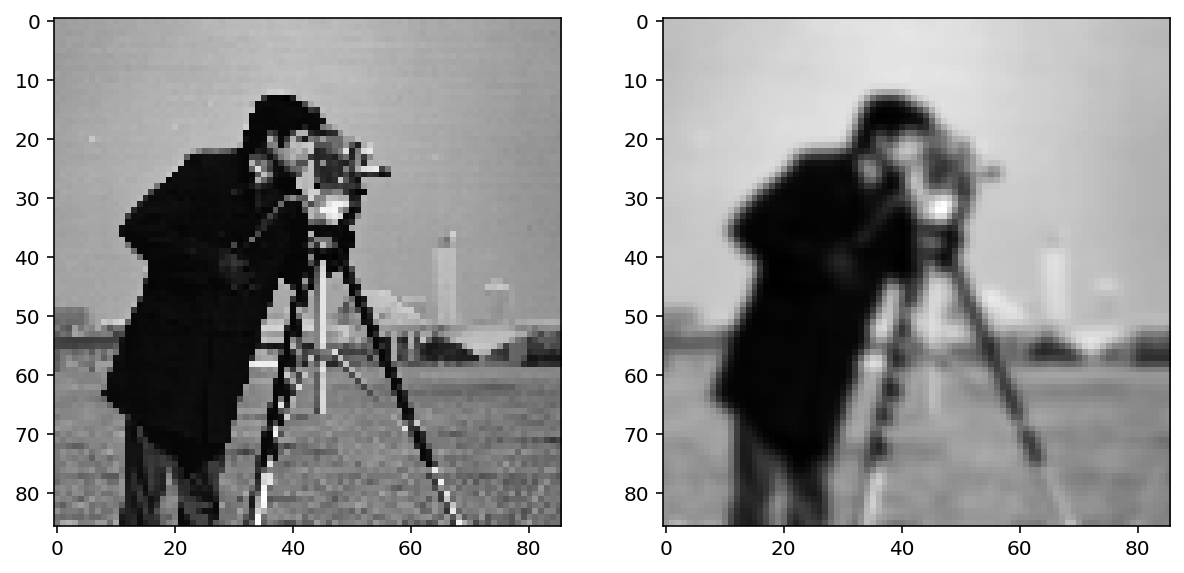

In [19]:
from skimage import img_as_float

sigma = 1  # Standard-deviation of Gaussian; larger smooths more.
pixelated_float = img_as_float(pixelated)
pixelated_float = pixelated

smooth = filters.gaussian(pixelated_float, sigma) 
imshow_all(pixelated_float, smooth)


#### Βήμα 2: Φίλτρο Sobel

Έπειτα εφαρμόζουμε το sobel φίλτρο:

(86, 86)


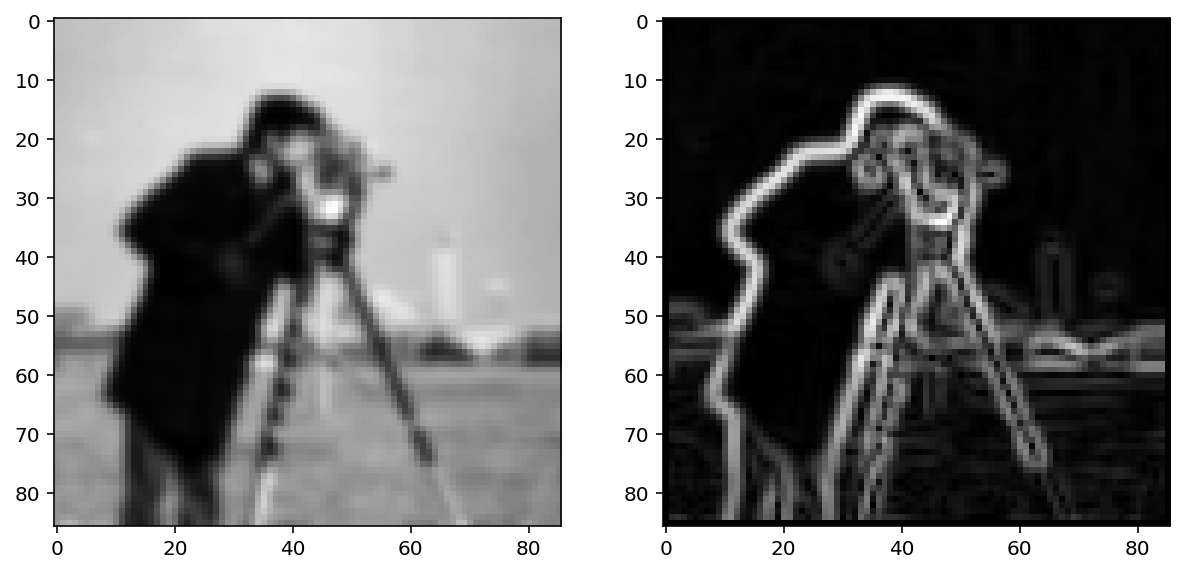

In [20]:
gradient_magnitude = filters.sobel(smooth)
imshow_all(smooth, gradient_magnitude)

amplitude=abs(abs(gradient_magnitude))
phase=np.angle(gradient_magnitude)
print(amplitude.shape)

Η συνέλιξη της εικόνας με το gaussian φίλτρο , παράγει "ζάρες" μεγάλου εύρους και για να τις εξαλείψουμε προχωρούμε στο βήμα 3.

#### Βήμα 3: Εξάλειψη μη μεγίστων (Non-maxima suppression)

Στόχος της εξάλειψης των μη μεγίστων (nonmaxima suppression) είναι να εξαλείψουμε τις κλίσεις (gradients) που υπολογίσαμε με το Sobel, οι οποίες δεν είναι oι πραγματικές ακμές (είναι ανεπιθύμητες ζάρες). Θεωρούμε τους πίνακες $Μ(x,y)$ (μέτρο) και $α(x,y)$ (γωνία κλίσης) της εξομαλυμένης εικόνας. 

![](https://drive.google.com/uc?id=1_X_qcjwpMsglCtaHyJSSeie9d4CSf-X6)

Η διεύθυνση της ακμής μπορεί να καθοριστεί με τη βοήθεια της διεύθυνσης της καθέτου επί της ακμής, την οποία μπορούμε να υπολογίσουμε άμεσα, όπως ήδη γνωρίζουμε, από τα δεδομένα της εικόνας ($α(x,y)=tan^{-1}(\frac{g_y}{g_x})$).

Θεωρώντας για παράδειγμα, μια περιοχή διαστάσεων 3x3 μπορούμε να ορίζουμε 4 διευθύνσεις της ακμής (μέχρι τώρα είχαμε δει 2, κάθετη και οριζόντια). Ο κύκλος στην παραπάνω εικόνα δείχνει με διαβαθμίσεις του γκρι αυτές τις περιοχές της εικόνας (d1:οριζόντια, d2:-45, d3:+45, d4:κάθετη). Ο αλγόριθμος για μία περιοχή διαστάσεων 3x3 της εικόνας, η οποία έχει ως κέντρο το κάθε σημείο (x,y) της συνάρτησης $α(x,y)$, έχει ως εξής:

1. Αρχικοποιούμε την $g_N(x,y)$ ως την εικόνα με τα εξαλειφθέντα μη μέγιστα.Στην πραγματικότητα είναι η εικόνα $M(x,y)$ με τα μη μέγιστα σημεία των ακμών να έχουν εξαλειφθεί.

2. Για το κεντρικό εικονοστοιχείο της περιοχής 3x3 που εξετάζουμε, βρίσκουμε τη διεύθυνση $d_k$, η οποία είναι η πλησιέστερη της γωνίας $α(x,y)$ που του αντιστοιχεί.

3. Εάν η τιμή της συνάρτησης $M(x,y)$ είναι μικρότερη μιας τουλάχιστον από τις τιμές κατά μήκος της διεύθυνσης $d_k$, θέτουμε $g_N(x,y)=0$ (εξάλειψη). Στην αντίθετη περίπτωση, θέτουμε $g_N(x,y)=M(x,y)$.


In [ ]:
def nonmaximasuppression(det, phase):
    gmax = np.zeros(det.shape)
    
    for i in range(det.shape[0]):
      for j in range(det.shape[1]):
        if phase[i][j] < 0:
          phase[i][j] += 360

        if ((j+1) < gmax.shape[1]) and ((j-1) >= 0) and ((i+1) < gmax.shape[0]) and ((i-1) >= 0):
          # 0 degrees
          if (phase[i][j] >= 337,5 or phase[i][j] < 22,5) or (phase[i][j] >= 157,5 and phase[i][j] < 202,5):
            if det[i][j] >= det[i][j + 1] and det[i][j] >= det[i][j - 1]:
              gmax[i][j] = det[i][j]
          # 45 degrees
          if (phase[i][j] >= 22,5 and phase[i][j] < 67,5) or (phase[i][j] >= 202,5 and phase[i][j] < 247,5):
            if det[i][j] >= det[i - 1][j + 1] and det[i][j] >= det[i + 1][j - 1]:
              gmax[i][j] = det[i][j]
          # 90 degrees
          if (phase[i][j] >= 67,5 and phase[i][j] < 112,5) or (phase[i][j] >= 247,5 and phase[i][j] < 292,5):
            if det[i][j] >= det[i - 1][j] and det[i][j] >= det[i + 1][j]:
              gmax[i][j] = det[i][j]
          # 135 degrees
          if (phase[i][j] >= 112,5 and phase[i][j] < 157,5) or (phase[i][j] >= 292,5 and phase[i][j] < 337,5):
            if det[i][j] >= det[i - 1][j - 1] and det[i][j] >= det[i + 1][j + 1]:
              gmax[i][j] = det[i][j]
    return gmax


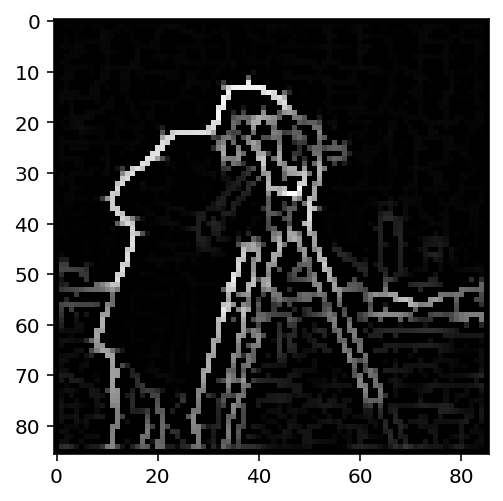

In [22]:
gmax=nonmaximasuppression(amplitude, phase)
plt.imshow(gmax,cmap='gray') 
  

#### Βήμα 4: (Κατωφλίωση Υστέρησης) Hysteresis thresholding

Το τελευταίο βήμα είναι ουσιαστικά μια διαδικασία λήψης απόφασης. Εδώ έχουμε δύο παραμέτρους: το χαμηλό και το υψηλό κατώφλι. Το υψηλό κατώφλι θέτει την τιμή κλίσης ίση με την τιμή της μέγιστης τιμής της ακμής και αντίστοιχα για το χαμηλό κατώφλι.

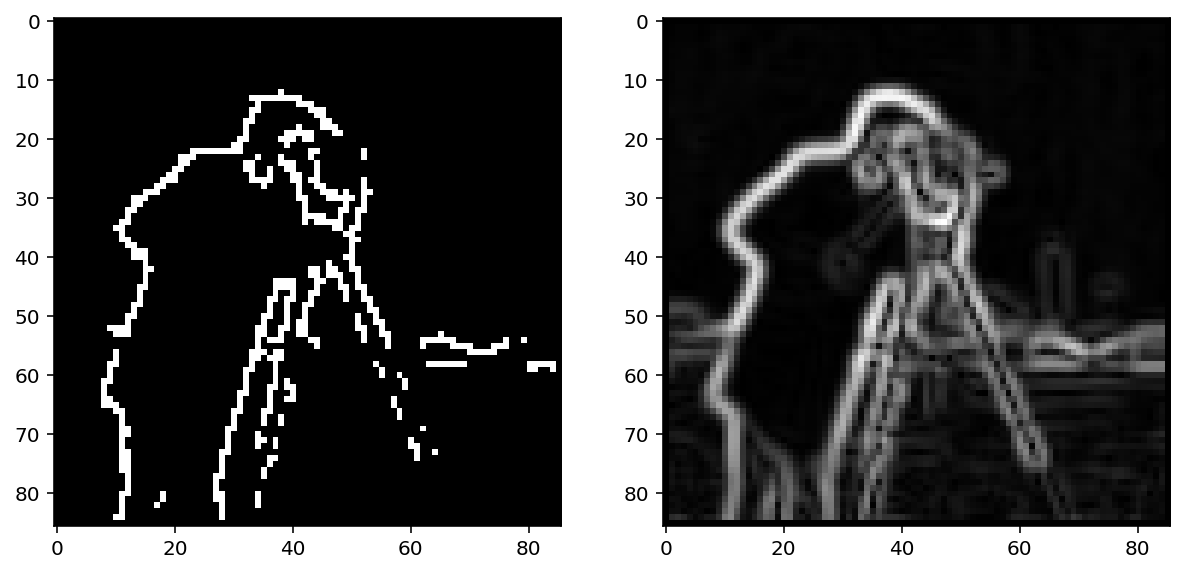

In [23]:
from skimage import color

low_threshold = np.min(gmax)+0.15
high_threshold = np.max(gmax)
label_image = np.zeros_like(gmax)
label_image[gmax > low_threshold] = 1
label_image[gmax > high_threshold] = 2
imshow_all(label_image, gradient_magnitude)

####Χρήση της έτοιμης συνάρτησης `feature.canny`

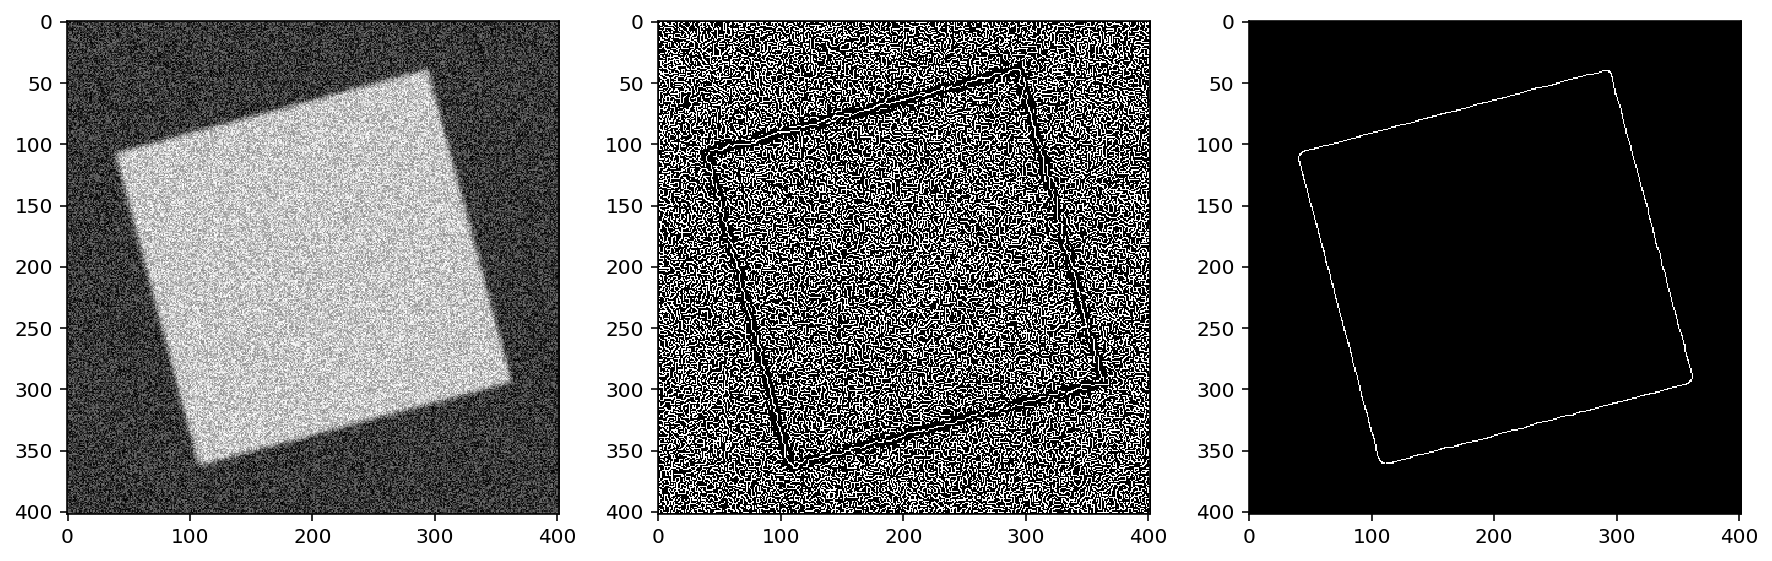

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature


# Generate noisy image of a square
im = np.zeros((328, 328))
im[32:-32, 32:-32] = 1

im = ndi.rotate(im, 15, mode='constant')
im = ndi.gaussian_filter(im, 2)
im += 0.8 * np.random.random(im.shape)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

imshow_all(im,edges1,edges2)



### Χρήση παραγώγων 2ης τάξης για όξυνση της εικόνας 

#### Laplacian

Ως γνωστόν, η απόκριση των ισοτροπικών φίλτρων είναι ανεξάρτητη από την κατεύθυνση των ασυνεχειών στην εικόνα επί της οποίας εφαρμόζεται το φίλτρο δηλαδή τα ισοτροπικά φίλτρα είναι αναλλοίωτα κάτω από περιστροφές.

Ο πιο απλός ισοτροπικός τελεστής παραγώγισης είναι η λαπλασιανή:
 $\nabla^2 f=\frac{\partial^2f}{\partial x^2}+\frac{\partial^2f}{\partial y^2} \ (3)$.

 όπου
 $ \frac{\partial^2f}{\partial x^2}=f(x+1,y)+f(x-1,y)-2f(x,y) \ (4)$

 $\frac{\partial^2f}{\partial y^2}=f(x,y+1)+f(x,y-1)-2f(x,y) \ (5)$ οπότε

$\nabla^2 f=f(x+1,y)+f(x-1,y)+f(x,y+1)+f(x,y-1)-4f(x,y) \  (6)$.

Η εξίσωση αυτή μπορεί να υλοποιηθεί χρησιμοποιώντας τη μάσκα πάνω αριστερά, η οποία δίνει ισοτροπικό αποτέλεσμα για περιστροφές με βήμα αύξησης τις 90$^ο$.

Οι διαγώνιες διευθύνσεις μπορούν να ενσωματωθούν στην εξίσωση (6) προσθέτοντας 2 ακόμα όρους, έναν όρο για κάθε μία από τις διαγώνιες διευθύνσεις(είτε της μορφής (4) ή της (5)), δημιουργώντας ισοτροπική μάσκα για μεταβολές 45$^ο$ (μάσκα με το 8 ή -8 στο κέντρο της).


![alt text](https://drive.google.com/uc?id=1SNBAjWOX_yqLaW7R1UndctMx1kWRFMSp)

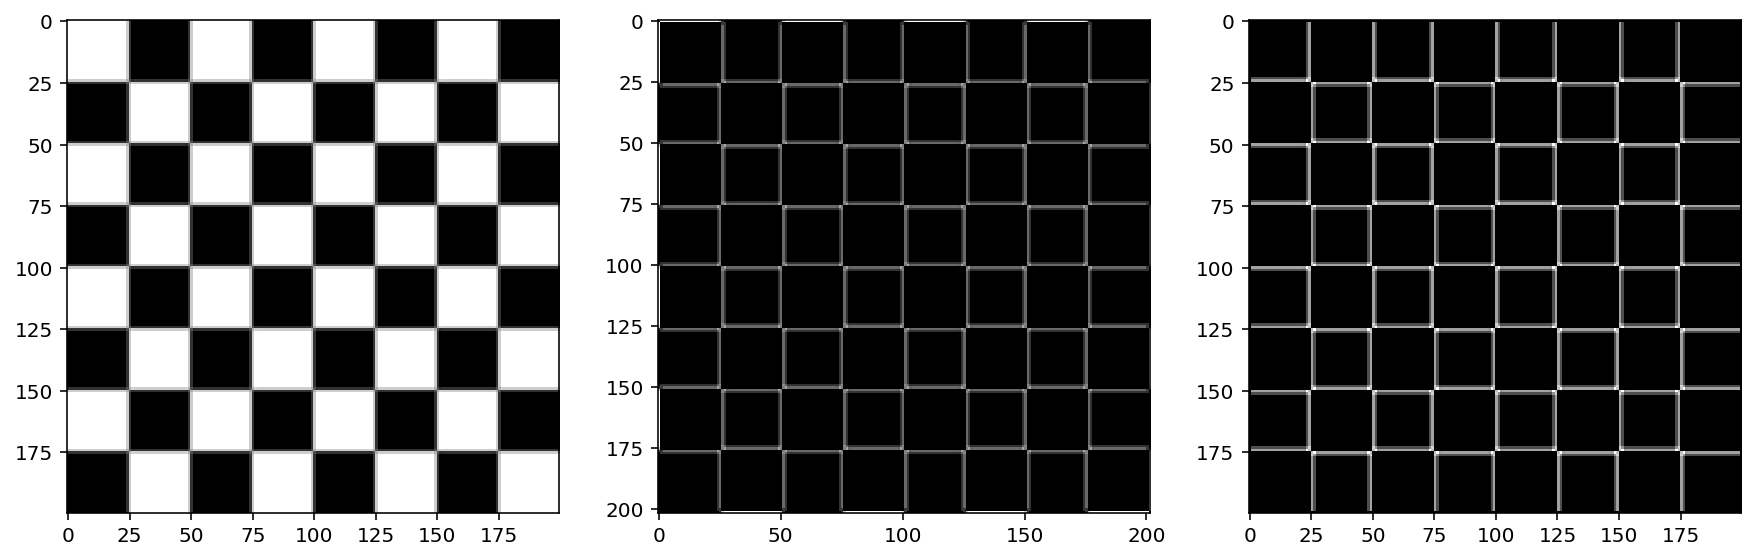

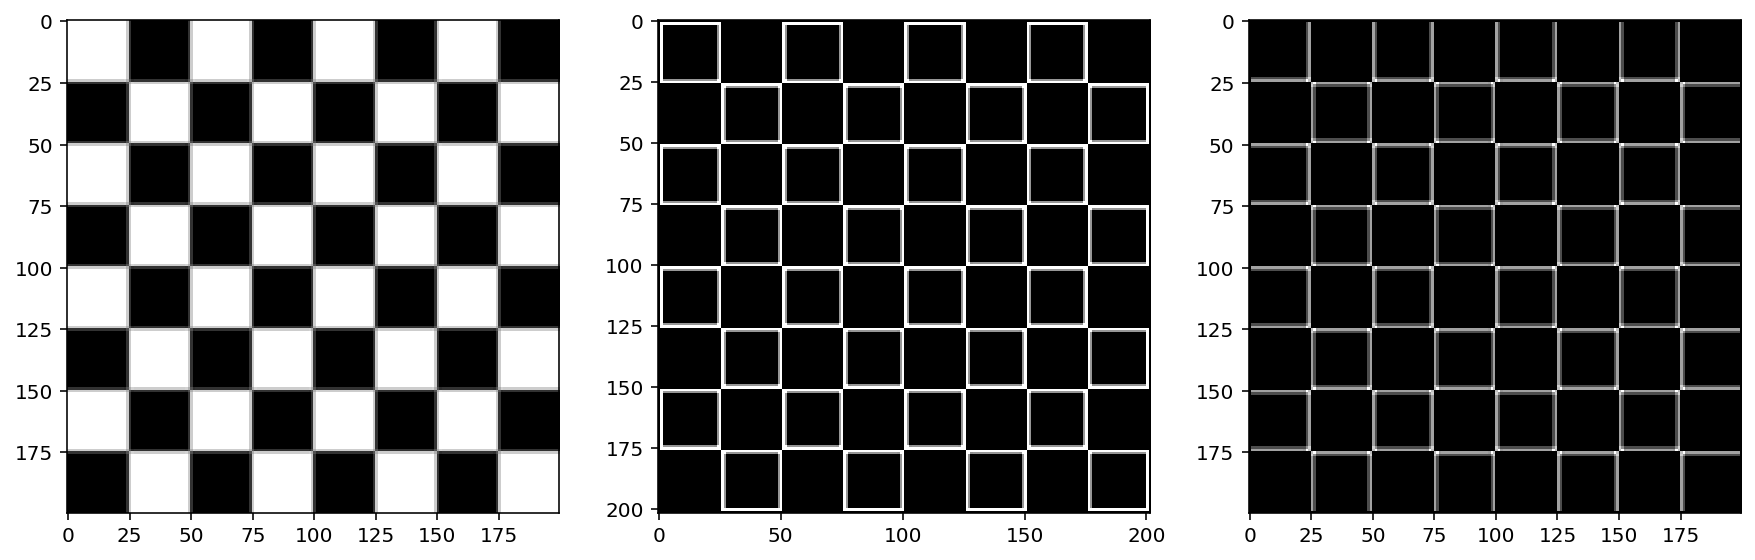

In [25]:
from skimage.filters import laplace

laplacian_kernel = [[0,1,0],[1, -4, 1],[0,1,0]]
laplacian_kernel1 = [[-1,-1,-1],[-1, 8, -1],[-1,-1,-1]]

CB= data.checkerboard()
CBconvimlaplacian = np.clip(signal.convolve2d(CB, laplacian_kernel),0,255)
CBlaplacian_filter= np.clip(laplace(CB), 0, 1)

imshow_all(CB,CBconvimlaplacian,CBlaplacian_filter)


CB= data.checkerboard()
CBconvimlaplacian = np.clip(signal.convolve2d(CB, laplacian_kernel1),0,255)
CBlaplacian_filter= np.clip(laplace(CB), 0, 2)

imshow_all(CB,CBconvimlaplacian,CBlaplacian_filter)

#### Ανιχνευτής ακμών Marr-Hildreth

Οι Marr και Hildreth διατύπωσαν τον ισχυρισμό πώς οι μεταβολές στην ένταση δεν είναι ανεξάρτητες της κλίμακας της εικόνας και επομένως η ανίχνευσή τους απαιτεί τελεστές με διαφορετικά μεγέθη.

Έτσι πρότειναν έναν τελεστή που να μπορεί να υπολογίζει μια ψηφιακή προσέγγιση και την 1η και την 2η παράγωγο σε κάθε σημείο της εικόνας και να μπορεί να λειτουργήσει σε οποιαδήποτε κλίμακα, με τους μεγάλους τελεστές να χρησιμοποιούνται για ανίχνευση θολών ακμών και τους τελέστες μικρού μεγέθους να ανιχνεύουν μικρολεπτομέρειες της εικόνας. Αυτός ήταν το φίλτρο  $\nabla^2 G(x,y)=\frac{\partial^2G(x,y)}{\partial x^2}+\frac{\partial^2G(x,y)}{\partial y^2}$ 
όπου $G=e^{-\frac{x^2+y^2}{2σ^2}}$

 $\nabla^2 G(x,y)=[\frac{x^2+y^2-2σ^2}{σ^4}]\ e^{-\frac{x^2+y^2}{2σ^2}}$,
 
 το οποίο είναι γνωστό ως Λαπλασιανή μιας Γκαουσιανής (Laplacian of Gaussian, LoG ή τελεστής Μεξικάνικου καπέλου).

 ![alt text](https://drive.google.com/uc?id=1YGCKDlRlMpDowwMjxQ0-TwZhDcthGTHB)

Στην παραπάνω εικόνα βλέπουμε το τρισδιάστατο γράφημα του αρνητικού της συνάρτησης LoG, τo αρνητικό της συνάρτησης LoG εμφανιζόμενο ως εικόνα, μία διατομή του και μία προσέγγιση διαστάσεων 5x5 του σχήματός της (στην πράξη θα πρέπει να χρησιμοποιηθεί το αρνητικό αυτής της μάσκας). Τα σημεία διέλευσης (zero crossing) της καμπύλης από το μηδέν είναι αυτά όπου $x^2+y^2=2σ^2$, όπου αντιστοιχεί σε κύκλο με ακτίνα $\sqrt{2}σ$ και κέντρο την αρχή των συντεταγμένων.

Η κατά προσέγγιση της 5x5 μάσκας δεν είναι μοναδική. Στόχος της είναι να αναπαραστήσει την LoG. Η μάσκα έχει έναν όρο στο κέντρο που περιβάλλεται με αρνητικούς όρους που μεταβάλλονται σε συνάρτηση με την απόσταση και μια μηδενική εξωτερική περιοχή. To άθροισμα των συντελεστών αυτής της μάσκας θα πρέπει να είναι ίσο με το μηδέν, έτσι ώστε η απόκρισή της σε περιοχές σταθερής έντασης να έχει και αυτή μηδενική τιμή.







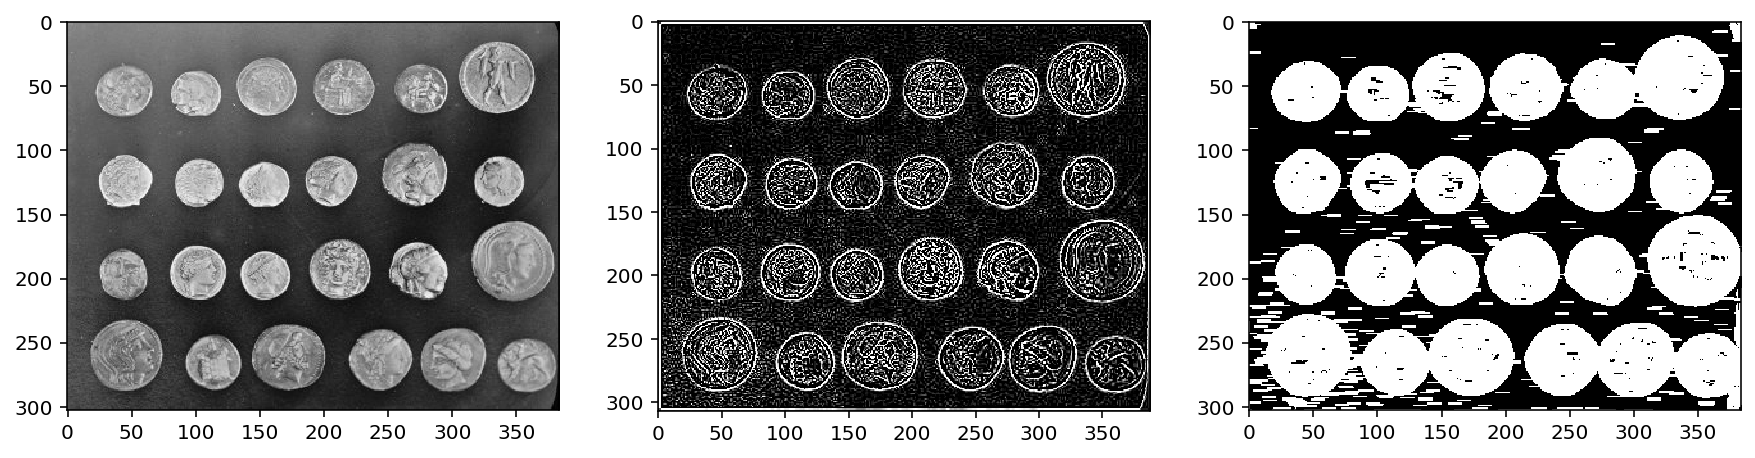

In [26]:
LoG_kernel = [[0,0,1,0,0],[0,1,2,1,0],[1, 2, -16,2,1],[0,1,2,1,0],[0,0,1,0,0]]

CB= data.coins()

CBconvimlog = np.clip(signal.convolve2d(CB, LoG_kernel),0,255)

CB_LoG_filter = np.clip(ndi.gaussian_laplace(CB, 2),0,1)

imshow_all(CB,CBconvimlog,CB_LoG_filter)


Βήματα υπολογισμού αλγορίθμου ανίχνευσης ακμών του Marr-Hildreth
1. Φιλτράρισμα της εικόνας εισόδου με ένα Gaussian lowpass filter,
2. Υπολογισμός της Laplacian της εικόνας που δημιουργήθηκε στο βήμα 1,
3. Προσδιορισμός των σημείων διέλευσης από το μηδέν της εικόνας που δημιουργήθηκε στο Βήμα 2


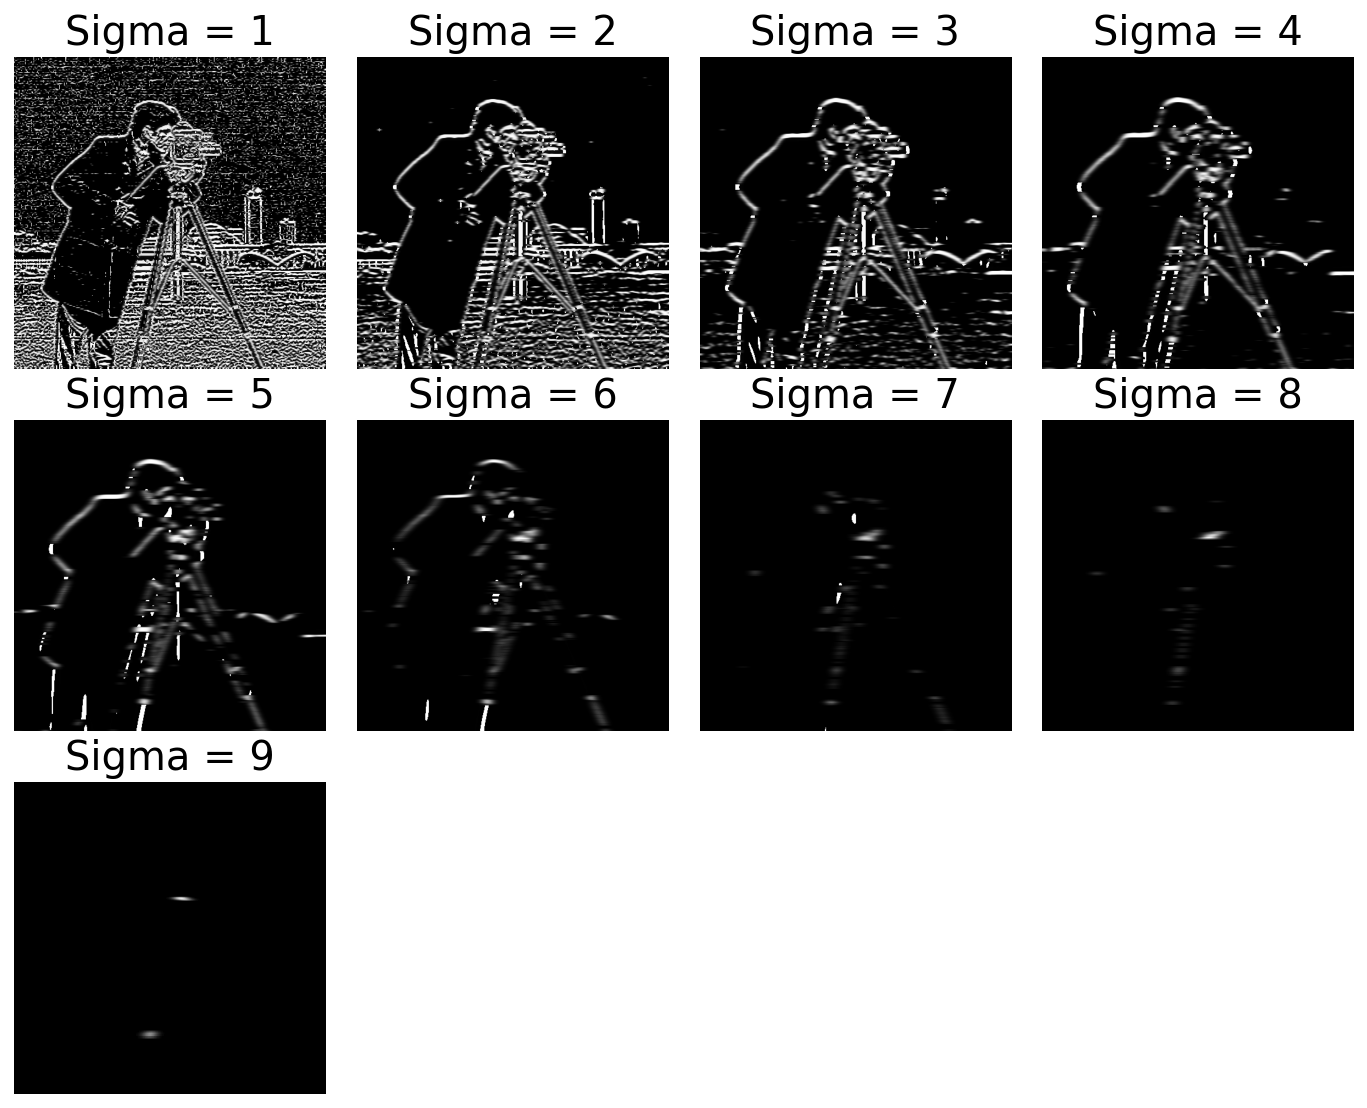

In [27]:
img= data.camera()

pylab.figure(figsize=(12,20))

for sigma in list(range(1,10)):
    img_log=ndi.gaussian_laplace(img, sigma=sigma)  
    pylab.subplot(6,4,sigma), pylab.imshow(img_log, cmap='gray'), pylab.axis('off')
    pylab.title('Sigma = ' + str(sigma), size=20)

pylab.subplots_adjust(wspace=0.1, hspace=0)
pylab.show()
